<p style="background-color:mediumorchid;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>Introductory to RNN</b></p>

# <font color='purple'> <b>RNN Syntax Basics</b><font color='black'>  

## <font color='mediumorchid'> <b>Importing Libraries</b><font color='black'>  

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## <font color='mediumorchid'> <b>Creating Data</b><font color='black'>  

We will create our data (sequence) ourselves. Using __linspace__, we have selected 501 numbers between 0 and 50. We then calculated the sine values of these points and assigned these values to *y*.

In [74]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [75]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

The maximum value of the sine function is 1 and the minimum value is -1.

In [77]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

The aim is to make a forecast by predicting the next values ​​of the dataset.

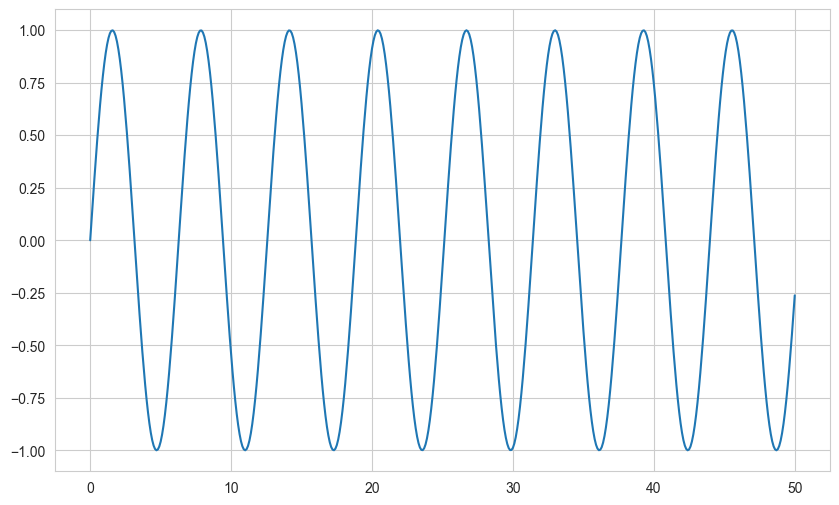

In [79]:
plt.plot(x,y);

Let's turn this into a DataFrame

In [81]:
df = pd.DataFrame(index=x, data=y, columns=['Sine'])

A dataframe with a single feature was created.

The variable *x* represents the data used as an index, while the variable *y* represents the data used as the 'Sine' column. This code aims to create a DataFrame by using *y* data under the 'Sine' column name and *x* data as the index.

In [83]:
df

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


## <font color='mediumorchid'> <b>Preprocessing of Data</b><font color='black'>  

### <font color='plum'> <b>Train | Test Split</b><font color='black'>  

In [86]:
len(df)

501

Until now, when separating test and train data, a random division was done. Here, we will not divide our data randomly because the order of the data is important. Therefore, we will reserve a certain section from the last part of the data as test data.

In [88]:
test_percent = 0.15

15% corresponds to the 75th index in the dataset.

In [90]:
len(df)*test_percent

75.14999999999999

To get rid of the oddity, the length of the data up to 75 was assigned to a variable with round.

In [92]:
test_point = np.round(len(df)*test_percent)
test_point

75.0

If we subtract this value from the actual length of df, we are left with the data we will use for the train part. The data from the beginning to 426 will be the train data, and the rest will be the test data.

In [94]:
test_ind = int(len(df) - test_point)
test_ind

426

Took the part up to test_ind as train data and the part after test_ind as test data.

In [96]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

This code example is used to split a DataFrame into two parts. Here is a detailed explanation of each line of the code:

`train = df.iloc[:test_ind]`: This line is used to split the DataFrame into two parts, creating the "train" containing training data and "test" containing testing data.

- `df`: This is the name or variable of the DataFrame, in this case, "df."
- `.iloc[]`: In pandas DataFrames, `.iloc[]` index is used to select specific rows and columns. This index selects data using row and column indices.
- `[:test_ind]`: This expression specifies which rows to select. A variable or integer called "test_ind" is used, and the data is split depending on its value. The ":" operator selects all rows from the beginning to the specified index.

`train = df.iloc[:test_ind]`: This line selects all rows from the beginning of the "df" DataFrame up to the "test_ind" index and assigns those rows to a new DataFrame called "train." This creates the "train" DataFrame, which contains the training data.

`test = df.iloc[test_ind:]`: This line selects all rows from the "test_ind" index onward in the "df" DataFrame and assigns those rows to a new DataFrame called "test." This creates the "test" DataFrame, which contains the testing data.

In summary, this code example splits the DataFrame into two separate parts, training and testing data. The "train" DataFrame contains the training data, while the "test" DataFrame contains the testing data. This is a common operation used for training and testing machine learning models.

In [98]:
train

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
42.100,-0.952
42.200,-0.978
42.300,-0.994
42.400,-1.000


In [99]:
test

,Sine
42.600,-0.982
42.700,-0.959
42.800,-0.925
42.900,-0.883
43.000,-0.832
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


### <font color='plum'> <b>Scaling</b><font color='black'>  

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
scaler = MinMaxScaler()

In [103]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [104]:
train_scaled[:10]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985],
       [0.73971381],
       [0.78232262],
       [0.82211054],
       [0.85868004],
       [0.89166571]])

In [105]:
test_scaled[:10]

array([[0.00885189],
       [0.02065929],
       [0.0372561 ],
       [0.05847648],
       [0.08410841],
       [0.11389578],
       [0.14754097],
       [0.1847078 ],
       [0.22502492],
       [0.2680895 ]])

### <font color='plum'> <b>Time Series Generator</b><font color='black'>  

TimeSeriesGenerator does not alter the data. This class is used to split time series data into specific groups based on a certain structure and feed these groups into a training or prediction model. In other words, it applies a windowing or image approach to the data but does not modify the data itself.

Therefore, when using TimeSeriesGenerator, the original dataset remains unchanged and preserved. This class is used to make the data more suitable for the model or to help improve the model's performance.

In [108]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

- __TimeSeriesGenerator --->__ Performs similar operations to ImageDataGenerator in CNN.
- Inside the generator, we used the __train_scaled__ data as __data__ and __targets__. This is because in RNN, the feature and target label are the same feature for making predictions.
- __length=3 --->__ The length of the sequences. "Predict the 4th based on the information from the first 3 rows."
- __batch_size --->__ 'How many data points will there be in one batch based on the above condition?' Here, we did it individually, but with large datasets, this is not feasible. (It is recommended to do it individually if possible.)
- __stride=1 --->__ After the first 2 data points, the 3rd will be predicted; then, after one step, the 4th will be predicted based on the 2nd and 3rd. This process will continue until the end.

In [110]:
# help(TimeseriesGenerator)

In [111]:
# define generator
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 1 # Number of timeseries samples in each batch
stride = 1 # Period between successive output sequences
generator = TimeseriesGenerator(data = train_scaled,                   # train datasi
                                targets = train_scaled,                
                                length = length,
                                batch_size = batch_size,
                                stride = stride)

In [112]:
len(train_scaled)

426

Although the scaled data has 426 entries, the Generator created 424 data points. Since the __length=2__, there are no data left after the last two values of the dataset for the prediction process. Therefore, it cannot use the last two rows. The number of generators is calculated using the formula: __len(generator) = (len(train) - length) / (batch_size * stride)__.

In [114]:
len(generator) # = (len(train)-lenght)/(batch_size*stride) 
# 426-2/1x1

424

In [115]:
generator

The generator provided the t_train and y_train values at index 0. For x_train, there are two values due to the length, and based on these two values, the 3rd value will be predicted.

In [117]:
generator[0]

(array([[[0.49999912],
         [0.54991622]]]),
 array([[0.59933458]]))

In [118]:
# What does the first batch look like?
X, y = generator[0]

To view the Generator more easily, we assigned the values to X and y, then printed them. We can see the given arrays and the 3rd row that needs to be predicted:

In [120]:
print(f'Given the Array: \n{X}')
print(f'Predict this y: \n{y}')

Given the Array: 
[[[0.49999912]
  [0.54991622]]]
Predict this y: 
[[0.59933458]]


We can also observe the first 3 values in the train_scaled dataset below:

In [122]:
train_scaled[:10]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985],
       [0.73971381],
       [0.78232262],
       [0.82211054],
       [0.85868004],
       [0.89166571]])

We modified the parameter values below and compared the differences with the previous ones:

In [124]:
# define generator
length = 3 # Length of the output sequences (in number of timesteps)
batch_size = 2 # Number of timeseries samples in each batch
stride = 2 # Period between successive output sequences
generator = TimeseriesGenerator(data = train_scaled,                   # train datasi
                                targets = train_scaled,                 
                                length = length,
                                batch_size = batch_size,
                                stride = stride)

In [125]:
len(train_scaled)

426

In [126]:
len(generator)     # (len(train)-lenght)/(batch_size*stride) 

106

It generated 106 generators. (426 - 3) / (2 * 2) = 106

In [128]:
generator

It will predict the value of 0.64776041 from the first trio, and the value of 0.73971381 from the next trio:

In [130]:
generator[0]

(array([[[0.49999912],
         [0.54991622],
         [0.59933458]],
 
        [[0.59933458],
         [0.64776041],
         [0.69470985]]]),
 array([[0.64776041],
        [0.73971381]]))

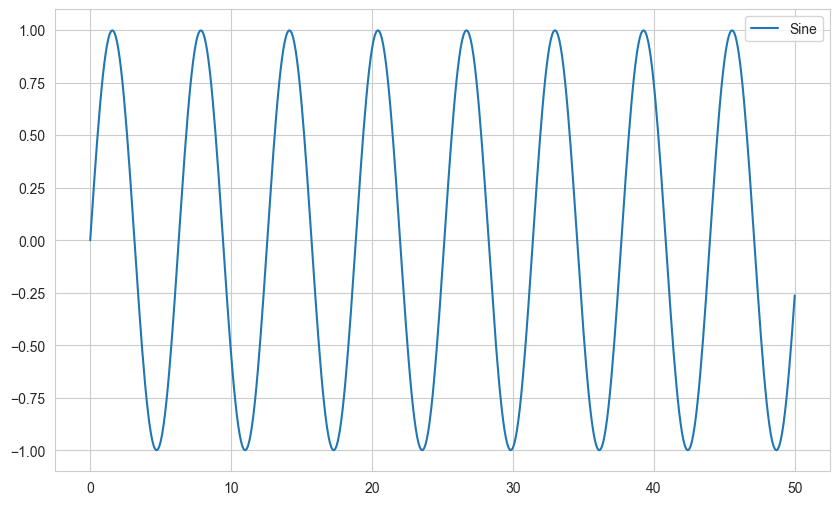

In [131]:
df.plot();

The more length the more training time

---

__How should the Length value be calculated?__: We need to obtain a self-renewing period. Since our first value starts from 0, a period is completed when it returns to 0. The dataset has 501 data points, and based on this, we calculate that the point where the first period is completed is 64. At 64, we can say there is a self-repeating period. By selecting batch_size=1, we created the generator:

In [134]:
length = 64        # Length of the output sequences (in number of timesteps)
batch_size = 1     # Number of timeseries samples in each batch
generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

In [135]:
# What does the first batch look like?
X, y = generator[0]

426 - 64 = 362 generators formed:

In [137]:
len(generator)

362

64 data will be given to the model, and the 65th number will be predicted according to them:

In [139]:
print(f'Given the Array: \n{X.flatten()}')    # We did flattening to see all the numbers.
print(f'Predict this y: \n{y}')

Given the Array: 
[4.99999116e-01 5.49916225e-01 5.99334579e-01 6.47760405e-01
 6.94709850e-01 7.39713809e-01 7.82322618e-01 8.22110545e-01
 8.58680040e-01 8.91665714e-01 9.20737985e-01 9.45606372e-01
 9.66022399e-01 9.81782075e-01 9.92727935e-01 9.98750612e-01
 9.99789928e-01 9.95835500e-01 9.86926839e-01 9.73152957e-01
 9.54651478e-01 9.31607263e-01 9.04250562e-01 8.72854714e-01
 8.37733417e-01 7.99237589e-01 7.57751870e-01 7.13690771e-01
 6.67494535e-01 6.19624741e-01 5.70559686e-01 5.20789614e-01
 4.70811810e-01 4.21125636e-01 3.72227539e-01 3.24606094e-01
 2.78737119e-01 2.35078919e-01 1.94067715e-01 1.56113277e-01
 1.21594831e-01 9.08572769e-02 6.42077324e-02 4.19124713e-02
 2.41942605e-02 1.12301346e-02 3.14962674e-03 3.34747619e-05
 1.91281421e-03 8.76886734e-03 2.05331307e-02 3.70880598e-02
 5.82682430e-02 8.38620552e-02 1.13613771e-01 1.47226122e-01
 1.84363264e-01 2.24654135e-01 2.67696162e-01 3.13059283e-01
 3.60290246e-01 4.08917133e-01 4.58454081e-01 5.08406134e-01]
Predi

## <font color='mediumorchid'> <b>Modeling</b><font color='black'>  

In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [142]:
# We're only using one feature in our time series
n_features = 1

In [143]:
seed = 42

We added a hidden layer to the model. 
- __units= 128 -->__ There are 128 neurons in the hidden layer.
- __input_shape=(length, n_features)) -->__ The first element is the number of rows, and the second element is the number of columns. length=64 is the number of rows, and n_features=1 is the number of columns.
- __model.add(Dense(units = 1)) -->__ There is 1 neuron in the output layer. (Since we are doing regression analysis, there should be only one neuron.)

---

RNN (Recurrent Neural Network) models typically use loss metrics instead of accuracy. This is because RNN models are often used with datasets containing continuous values, such as time series.

While accuracy is used for classification problems, RNN models are generally employed for regression tasks. In regression problems, the target variables are continuous numerical values, and the goal is to predict these values directly. Therefore, loss metrics (e.g., mse, rmse, etc.) are typically used.

---

Both Hyperbolic Tangent (tanh) and ReLU (Rectified Linear Unit) activation functions can be used in Recurrent Neural Networks (RNNs).

The Hyperbolic Tangent (tanh) function is a commonly used activation function in RNNs. The tanh function limits input values between -1 and 1, producing negative outputs for negative inputs and positive outputs for positive inputs. Thus, it can be preferred to provide a suitable range for the values of hidden states in RNNs.

The ReLU (Rectified Linear Unit) function is also an activation function that can be used in RNNs. The ReLU function outputs the input value if it is greater than 0, or 0 if the input is less than 0. The advantages of ReLU include high computation speed and the ability to propagate the gradient smoothly.

The choice of which activation function to use depends on the nature of your problem and the characteristics of your dataset. Both functions may be suitable for different scenarios. Therefore, it is important to experiment with both tanh and ReLU functions in your RNNs and observe which one produces better results.

In [145]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(units = 128, activation = "tanh", input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(units = 1))   

model.compile(optimizer='adam', loss='mse')

The `input_shape` parameter specifies the shape of the input data. `length` represents the number of time steps in the input sequence, and `n_features` represents the number of features used at each time step.

---

The hidden layer has many parameters. If we had built an ANN model, there would have been far fewer parameters. (If we had used LSTM instead of Simple RNN, we would have had 4 times more parameters due to the 4 gates).

In [147]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,769 (65.50 KB)

 Trainable params: 16,769 (65.50 KB)

 Non-trainable params: 0 (0.00 B)

Formula to find the number of parameters:

In [149]:
model.fit(generator, epochs = 6)

Epoch 1/6
362/362 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0546
Epoch 2/6
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.7084e-04
Epoch 3/6
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.1423e-05
Epoch 4/6
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.4494e-04
Epoch 5/6
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.2107e-05
Epoch 6/6
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.1103e-04


Since we do not have validation data, we cannot see whether there is an overfit situation or not:

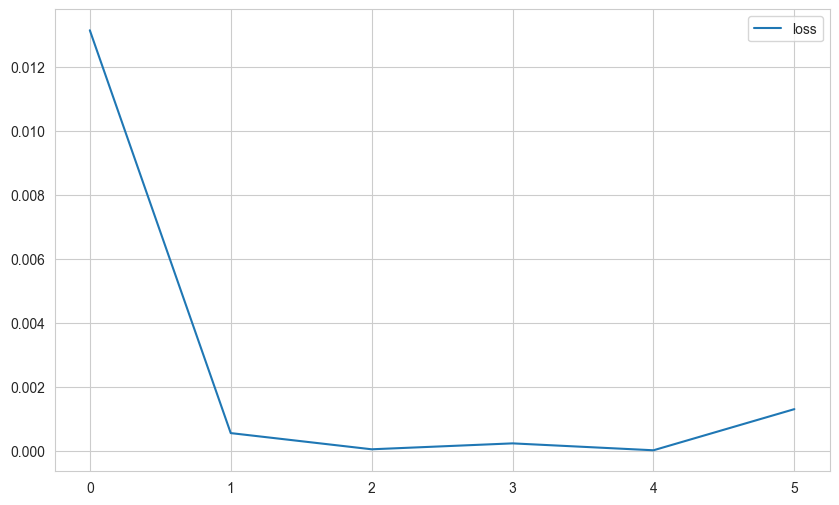

In [151]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

## <font color='mediumorchid'> <b>Evaluate on Test Data</b><font color='black'>  

To evaluate the data, we need to make forecasts on the training data.

We will take the last __length__ number of data points and try to predict the next step based on this data. After making the prediction, we will add the predicted value back into the data and shift the sequence forward, then try to predict the next step. By continuing this process, adding new predictions to the end of the sequence, we can predict as many steps as needed. (It is recommended to forecast for as many steps as the length). Since this is a simple dataset, we can extend the forecasting process.

In [154]:
first_eval_batch = train_scaled[-length:]

We took the last __length__ number of data points from the dataset (the last 64 values):

In [156]:
first_eval_batch.shape

(64, 1)

The shape of the data is (64,1), but the model expects a shape of (1,64,1), meaning it should be 3-dimensional.

In [158]:
generator[0][0].shape

(1, 64, 1)

There are two methods to reshape the data. The first is to add 1 at the beginning to change the shape from 2D to 3D. The second method is the __expand_dim__ function:

In [160]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))
# first_eval_batch = np.expand_dims(first_eval_batch, axis=0)

In [161]:
first_eval_batch.shape

(1, 64, 1)

We can now give the reshaped data to the model for prediction. The model will predict the 65th value based on the 64 values from the data:

In [163]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


array([[0.00951161]], dtype=float32)

We will compare this prediction with the first element of the test data. The model made a prediction that is very close to the actual value. The prediction is a 2-dimensional array:

In [165]:
test_scaled[0]

array([0.00885189])

__SUMMARY ;__ We created an empty set called test_prediction. We will add our predictions into this empty set. We assigned the last __length__ number of data points from the training data to the first_eval_batch variable, reshaped it from 2D to 3D. We will define these inside the following for loop:

In [167]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [168]:
current_batch.shape

(1, 64, 1)

In [169]:
current_batch    # 64 data

array([[[1.27922981e-03],
        [7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.7

In [170]:
np.append(current_batch[:,1:,:], [[[0.0085]]], axis = 1)

array([[[7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.72558686e-01],
        [8.3

In the previous step, we made the model predict the 65th value based on the first 64 values (0.0085). We discarded the first value and added the predicted 65th value to the end using the __np.append__ method:
- __np.append__ requires an array, the prediction value to be added at the bottom of the array, and the axis where it should be appended.
- __current_batch[:,1:,:] -->__ The part where we write "1" refers to the number of rows. By changing this part, we told the model to start the index from 1 instead of 0. (The last dot refers to the number of columns). After this operation, the number of rows decreased to 63. Then, we appended the newly predicted value to the end of the array, reshaped it to 3D. As a result, the number of samples was restored to 64.

### <font color='plum'> <b>Final For Loop to Predict Step by Step </b><font color='black'>  

We will repeat the same process for 75 test data points using a for loop. We defined the same code we wrote earlier inside the for loop. For each iteration, it will make a prediction and append the result to the pre-defined empty list. Finally, we will update the current_batch and add the new prediction each time, removing one sample from the beginning. The forecast results obtained here will later be compared with the test data.

In [174]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

Predictions made during the forecast process:

In [176]:
predictions_scaled

[array([0.00951161], dtype=float32),
 array([0.02111715], dtype=float32),
 array([0.03717036], dtype=float32),
 array([0.05757337], dtype=float32),
 array([0.08189877], dtype=float32),
 array([0.10978094], dtype=float32),
 array([0.14113471], dtype=float32),
 array([0.17535155], dtype=float32),
 array([0.21189126], dtype=float32),
 array([0.2506433], dtype=float32),
 array([0.29106975], dtype=float32),
 array([0.33260185], dtype=float32),
 array([0.37499398], dtype=float32),
 array([0.41808695], dtype=float32),
 array([0.46104568], dtype=float32),
 array([0.5038369], dtype=float32),
 array([0.5459308], dtype=float32),
 array([0.58699954], dtype=float32),
 array([0.62665653], dtype=float32),
 array([0.6647262], dtype=float32),
 array([0.70070505], dtype=float32),
 array([0.73418534], dtype=float32),
 array([0.76512635], dtype=float32),
 array([0.79311377], dtype=float32),
 array([0.8177945], dtype=float32),
 array([0.83901316], dtype=float32),
 array([0.856582], dtype=float32),
 array([

Actual values ​​in the test data:

In [178]:
test_scaled

array([[8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],
       [5.58715219e-01],
       [6.07993616e-01],
       [6.56192968e-01],
       [7.02831682e-01],
       [7.47443761e-01],
       [7.89583454e-01],
       [8.28829716e-01],
       [8.64790412e-01],
       [8.97106234e-01],
       [9.25454293e-01],
       [9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],


## <font color='mediumorchid'> <b>Inverse Transformations and Comparing</b><font color='black'>  

Before comparing the real values with the predictions, we converted the prediction values back to the original scale using __inverse_transform__ to make the comparison possible:

This line of code performs a transformation operation that helps revert the scaled predictions back to the original data scale. This operation is particularly useful when predictions need to be brought back to their original data range, especially after scaling operations (such as scaling or standardization).

**Explanations:**

- **predictions:** This variable contains the scaled version of the predicted values. These predictions may have been obtained after a scaling operation was applied.
- **scaler:** This is an object representing the scaling process or transformation used. It performs the data transformation, especially when scaling methods like Min-Max scaling or Standardization are used.
- **inverse_transform():** This method is used to revert the scaled data back to its original data range. In other words, it converts the scaled predictions back to their original form.

As a result, the predicted values inside `predictions` are reverted from their scaled form to the original data range using the `scaler` object, making it possible to compare them with the original values or making the results more meaningful. This process ensures that the predictions are aligned with the original data scale.

In [181]:
predictions = scaler.inverse_transform(predictions_scaled)

In [182]:
predictions

array([[-0.98096714],
       [-0.95775624],
       [-0.92565009],
       [-0.88484439],
       [-0.83619398],
       [-0.78043008],
       [-0.71772305],
       [-0.64928993],
       [-0.57621108],
       [-0.4987076 ],
       [-0.41785539],
       [-0.33479185],
       [-0.25000827],
       [-0.16382303],
       [-0.07790624],
       [ 0.00767557],
       [ 0.09186264],
       [ 0.17399944],
       [ 0.2533128 ],
       [ 0.32945152],
       [ 0.40140865],
       [ 0.46836869],
       [ 0.53025021],
       [ 0.5862246 ],
       [ 0.63558567],
       [ 0.67802265],
       [ 0.71316002],
       [ 0.74061358],
       [ 0.76038845],
       [ 0.77227841],
       [ 0.77617223],
       [ 0.77212737],
       [ 0.76050361],
       [ 0.74131166],
       [ 0.71475574],
       [ 0.68144083],
       [ 0.64152797],
       [ 0.59546778],
       [ 0.54364314],
       [ 0.48648037],
       [ 0.42442432],
       [ 0.35796234],
       [ 0.28773182],
       [ 0.21390574],
       [ 0.13712938],
       [ 0

In [183]:
test

,Sine
42.600,-0.982
42.700,-0.959
42.800,-0.925
42.900,-0.883
43.000,-0.832
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


We added predictions to the test data as a new column:

In [185]:
test['RNN_Predictions'] = predictions

In [186]:
test

,Sine,RNN_Predictions
42.600,-0.982,-0.981
42.700,-0.959,-0.958
42.800,-0.925,-0.926
42.900,-0.883,-0.885
43.000,-0.832,-0.836
...,...,...
49.600,-0.617,-0.730
49.700,-0.536,-0.654
49.800,-0.449,-0.571
49.900,-0.357,-0.482


The actual values ​​and the prediction values ​​seem to be quite compatible:

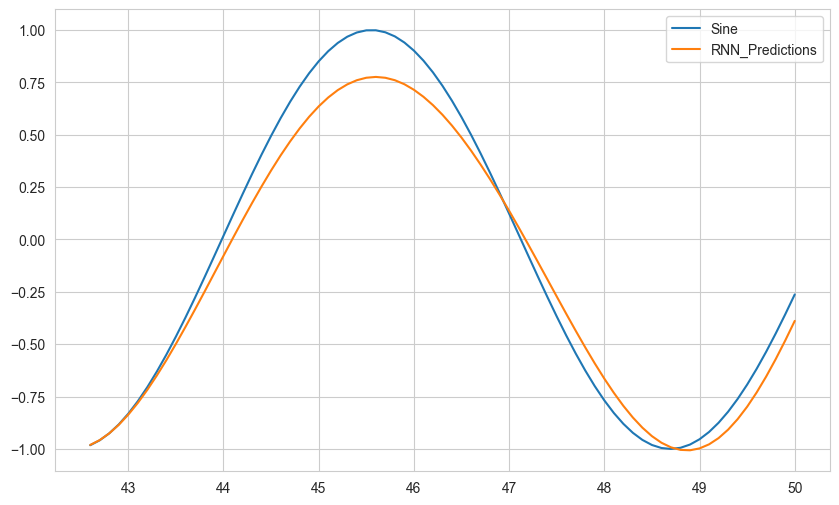

In [188]:
test.plot();

In [189]:
# Priot was 64, but since my test data was 75, the output above is more than one period.

## <font color='mediumorchid'> <b>Retrain and Forecasting</b><font color='black'>  

After checking the performance of the model, we will create the model using the entire data and make forecasts. We applied scaling to the entire data:

In [192]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

We provided the entire data to the data and target parts inside the `TimeseriesGenerator`. We kept the `length` and `batch_size` values the same as in the training:

In [194]:
length = 64 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

We created the model with the same parameters as our previously built LSTM model. The only difference was that we reduced the number of epochs to 6 because the model completed training in 5 epochs earlier. Since there was no validation data, we couldn't apply EarlyStopping. Therefore, we completed the training with 6 epochs:

In [196]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(units = 128, activation = "tanh", input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(units = 1))   

model.compile(optimizer='adam', loss='mse')
model.fit(generator, epochs = 6)

Epoch 1/6
437/437 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0150
Epoch 2/6
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5.5462e-04
Epoch 3/6
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.5345e-05
Epoch 4/6
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.1329e-04
Epoch 5/6
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6.7711e-05
Epoch 6/6
437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5.3297e-05


The length of the forecast we will make will be equal to `length`, which is 64. We won't be able to compare the forecast results with anything. Instead, we will visualize the predictions by appending them to the original DataFrame.

In [198]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━

This code is used to apply a time series forecasting model and predict future values. The process occurs in the following steps:

A list named `forecast` is created. This list will be used to store the future prediction values.

It is assumed that the data sequence, `scaled_full_data`, will be worked on. This data sequence contains the time series for which predictions will be made.

`first_eval_batch` is created by slicing the `scaled_full_data` array from the end, with a specific length. This slice will be used for the model’s first prediction.

`current_batch` reshapes the `first_eval_batch` array inside a list. This represents the input data that will be used by the model to make predictions.

A loop is used to compute the predictions. In each iteration, the following steps occur:

1. `model.predict(current_batch)` calculates the prediction for the next time step based on the current data slice.
2. The predicted value is appended to the `forecast` list.
3. `current_batch` is updated to include the new prediction and drops the first value, updating the data slice.

This loop generates a sequence of predicted values for a specific length and stores them in the `forecast` list. As a result, the code calculates predictions starting from the last time slice in the data sequence and stores them in the `forecast` list. In this way, a series of predictions is generated that can be used to predict future values.

---

This code example demonstrates making predictions using an LSTM-based model on time series data. Below, I will explain what the code does step by step:

`forecast = []`: A blank list is created to store the predictions.

`first_eval_batch = scaled_full_data[-length:]`: The data group used for the first prediction is selected by slicing from the end of the data with a length of 'length'.

`current_batch = first_eval_batch.reshape((1, length, n_features))`: The data group for the first prediction is reshaped to be compatible with the model. The LSTM model expects input in the form of (samples, timesteps, features), so the data group is converted to a 3D array.

`for i in range(length):`: A loop starts to make predictions. This loop will run `length` times, meaning it will predict for a specific number of future time steps.

`current_pred = model.predict(current_batch)`: The LSTM model calculates the prediction for the next time step based on the current data group (`current_batch`).

`forecast.append(current_pred[0])`: The prediction is appended to the `forecast` list. The predictions are stored as a list according to the model’s output format.

`current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)`: The data group is updated. This creates the data for the next prediction by removing the first time step and appending the new prediction to the last time step.

This loop runs `length` times, and each time, it generates a prediction for the next time step. As a result, the `forecast` list contains the model’s predictions for a specific length of the time series. These predictions can then be used or analyzed further.

In [200]:
forecast = scaler.inverse_transform(forecast)

In [201]:
forecast

array([[-0.15911966],
       [-0.05647491],
       [ 0.04786213],
       [ 0.15428715],
       [ 0.26128569],
       [ 0.36610689],
       [ 0.46865955],
       [ 0.56845982],
       [ 0.66225484],
       [ 0.74955778],
       [ 0.82953369],
       [ 0.9014522 ],
       [ 0.9628377 ],
       [ 1.01409108],
       [ 1.05524776],
       [ 1.08456037],
       [ 1.10263832],
       [ 1.11001469],
       [ 1.10636739],
       [ 1.09114163],
       [ 1.06601704],
       [ 1.03116887],
       [ 0.98628717],
       [ 0.93222881],
       [ 0.87007132],
       [ 0.79985964],
       [ 0.72176173],
       [ 0.63712274],
       [ 0.54653681],
       [ 0.45011467],
       [ 0.34892897],
       [ 0.2440912 ],
       [ 0.13621374],
       [ 0.02588965],
       [-0.08514564],
       [-0.19582009],
       [-0.30542357],
       [-0.41252749],
       [-0.5152947 ],
       [-0.61281147],
       [-0.70396656],
       [-0.78709302],
       [-0.860969  ],
       [-0.92494951],
       [-0.9780021 ],
       [-1

In [202]:
df

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


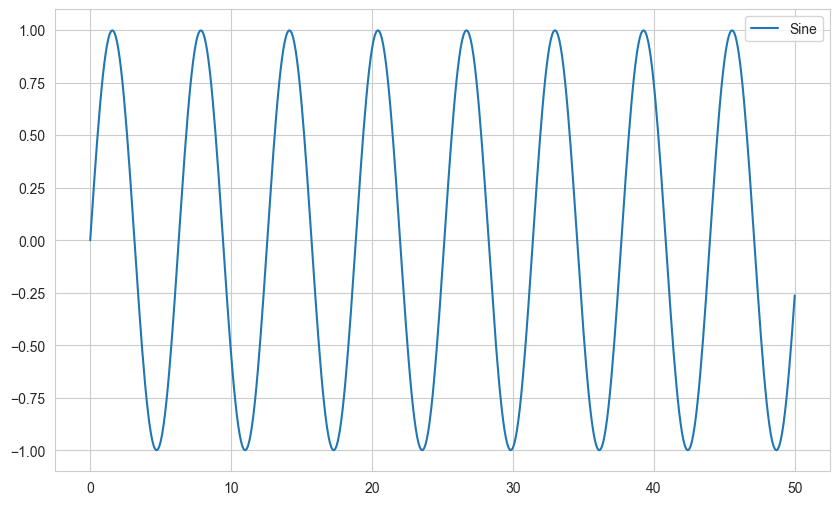

In [203]:
df.plot();

To visualize the predictions and the original dataframe, we need to create an index for the forecasts. These indices should match the dataframe’s index. The indices in the dataframe go in 0.1 steps and end at 50.00. The forecasts should follow this, starting from 50.1, 50.2, and so on.

In [205]:
forecast_len = len(forecast)
forecast_len

64

In [206]:
step = 0.1

In [207]:
forecast_len * step

6.4

The forecast index will start at 50.1, with a step of 0.1, and will increase by a total of 6.4, reaching 56.5. This way, we generated 64 indices and assigned them to a variable.

In [209]:
forecast_index = np.arange(50.1, 56.5, step = step)

In [210]:
len(forecast_index)

64

We created a visual by plotting both graphs together. One plot was created using the dataframe's index and column, while the second plot was created using the forecast index and the forecast values. This way, we can observe the forecasted values at the end of the data. (Different results may be obtained with each execution.)

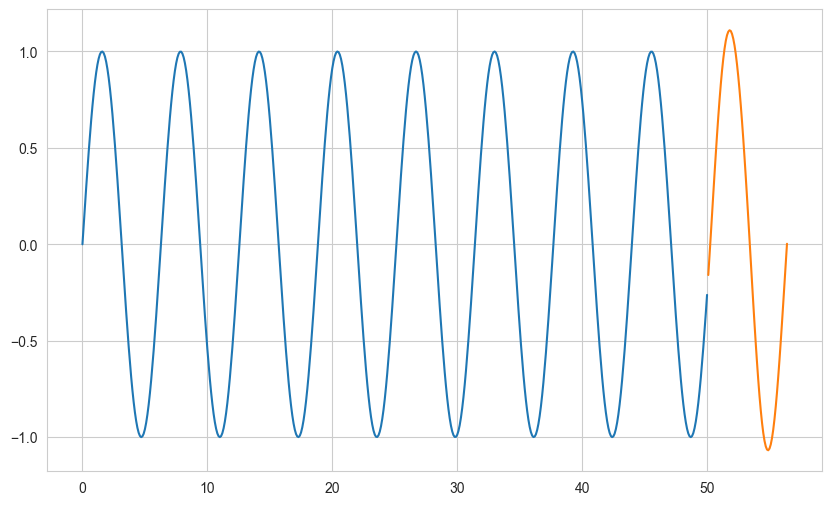

In [212]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast);

<p style="background-color:mediumorchid;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>THANK YOU!</b></p>